In [1]:
import helper
import pathlib
import importlib
import numpy as np
import seaborn as sns
from nilearn.image import load_img, iter_img, index_img, concat_imgs

In [5]:
FSL_ICs = load_img("/data/origami/niusha/out/ica_original_maps/melodic_IC.nii.gz")

In [7]:
FSL_ICs.shape

(101, 119, 97, 30)

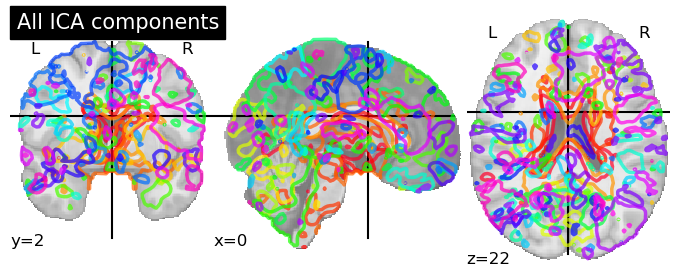

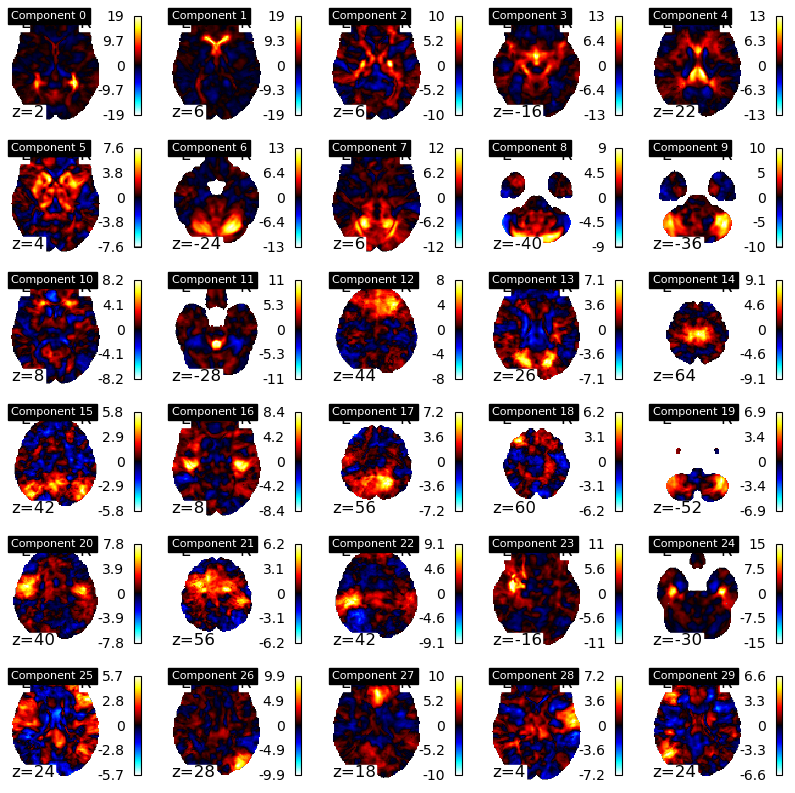

In [8]:
helper.plot_ICA_components(FSL_ICs)

In [53]:
importlib.reload(helper)

<module 'helper' from '/data/origami/niusha/code/local-experiment/helper.py'>

     ======== General Information ========
Number of nan voxels: 0
Overall Maximum: 19.3320
Overall Minimum: 0.0344
Overall Mean: -6.9119
Overall Variance: 0.3318


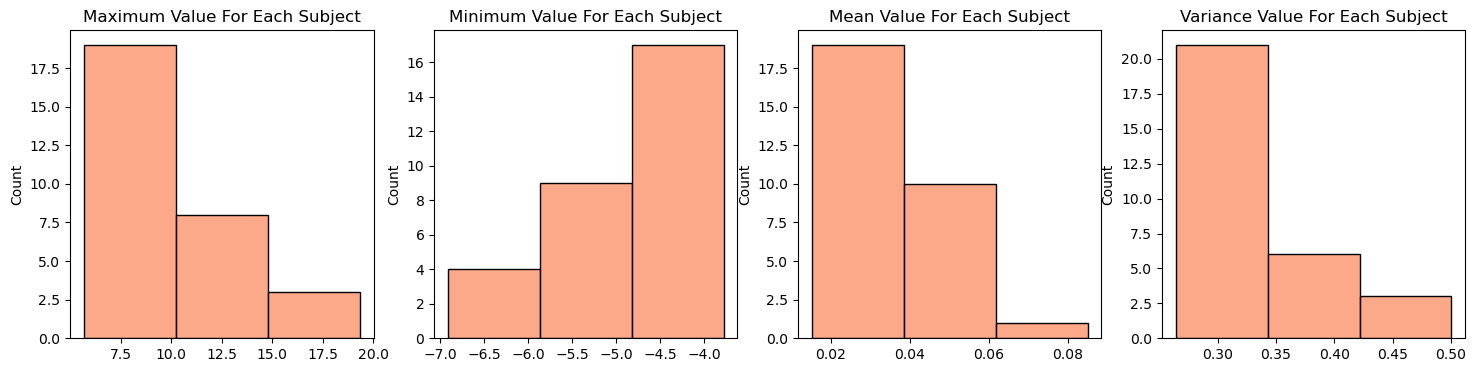

In [6]:
helper.image_report(FSL_ICs)

In [3]:
Ni_ICs = load_img("/data/origami/niusha/code/local-experiment/io/whole_original_data/ICAs/ICAs_whole_original.nii.gz")

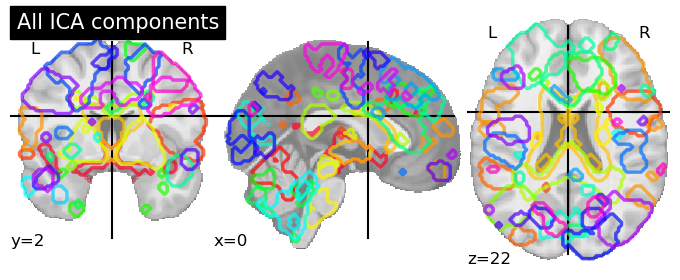

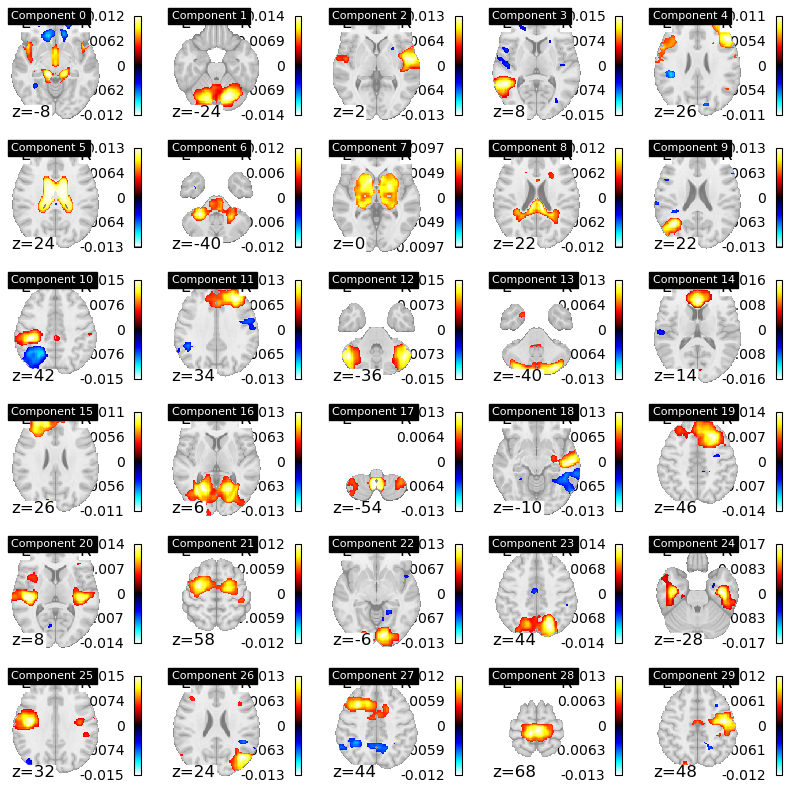

In [4]:
helper.plot_ICA_components(Ni_ICs)

In [6]:
import numpy as np

In [7]:
FSL_data = FSL_ICs.get_fdata()
Ni_data = Ni_ICs.get_fdata()

In [8]:
a = np.nanmax(FSL_data, axis=(0,1,2))
a.shape

(30,)

In [9]:
var = np.var(FSL_data, axis=(0,1,2))
var.shape

(30,)

In [10]:
FSL_data_re = np.reshape(FSL_data, newshape=[-1,30])
Ni_data_re = np.reshape(Ni_data, newshape=[-1,30])

In [11]:
idx = (FSL_data_re >= 3.0)

In [12]:
np.sum(idx[...,1])/len(np.ravel(idx[...,1]))

0.0043101858483517936

In [ ]:
import matplotlib.pyplot as plt

In [37]:
IC_corr = np.zeros((30,30))
for i in range(30):   
    for j in range(30):
        if j <= i:
            IC_corr[i,j] = np.corrcoef(FSL_data_re[:,i],Ni_data_re[:,j])[0,1]

In [38]:
import seaborn as sns

Text(283.22222222222223, 0.5, 'Nilearn')

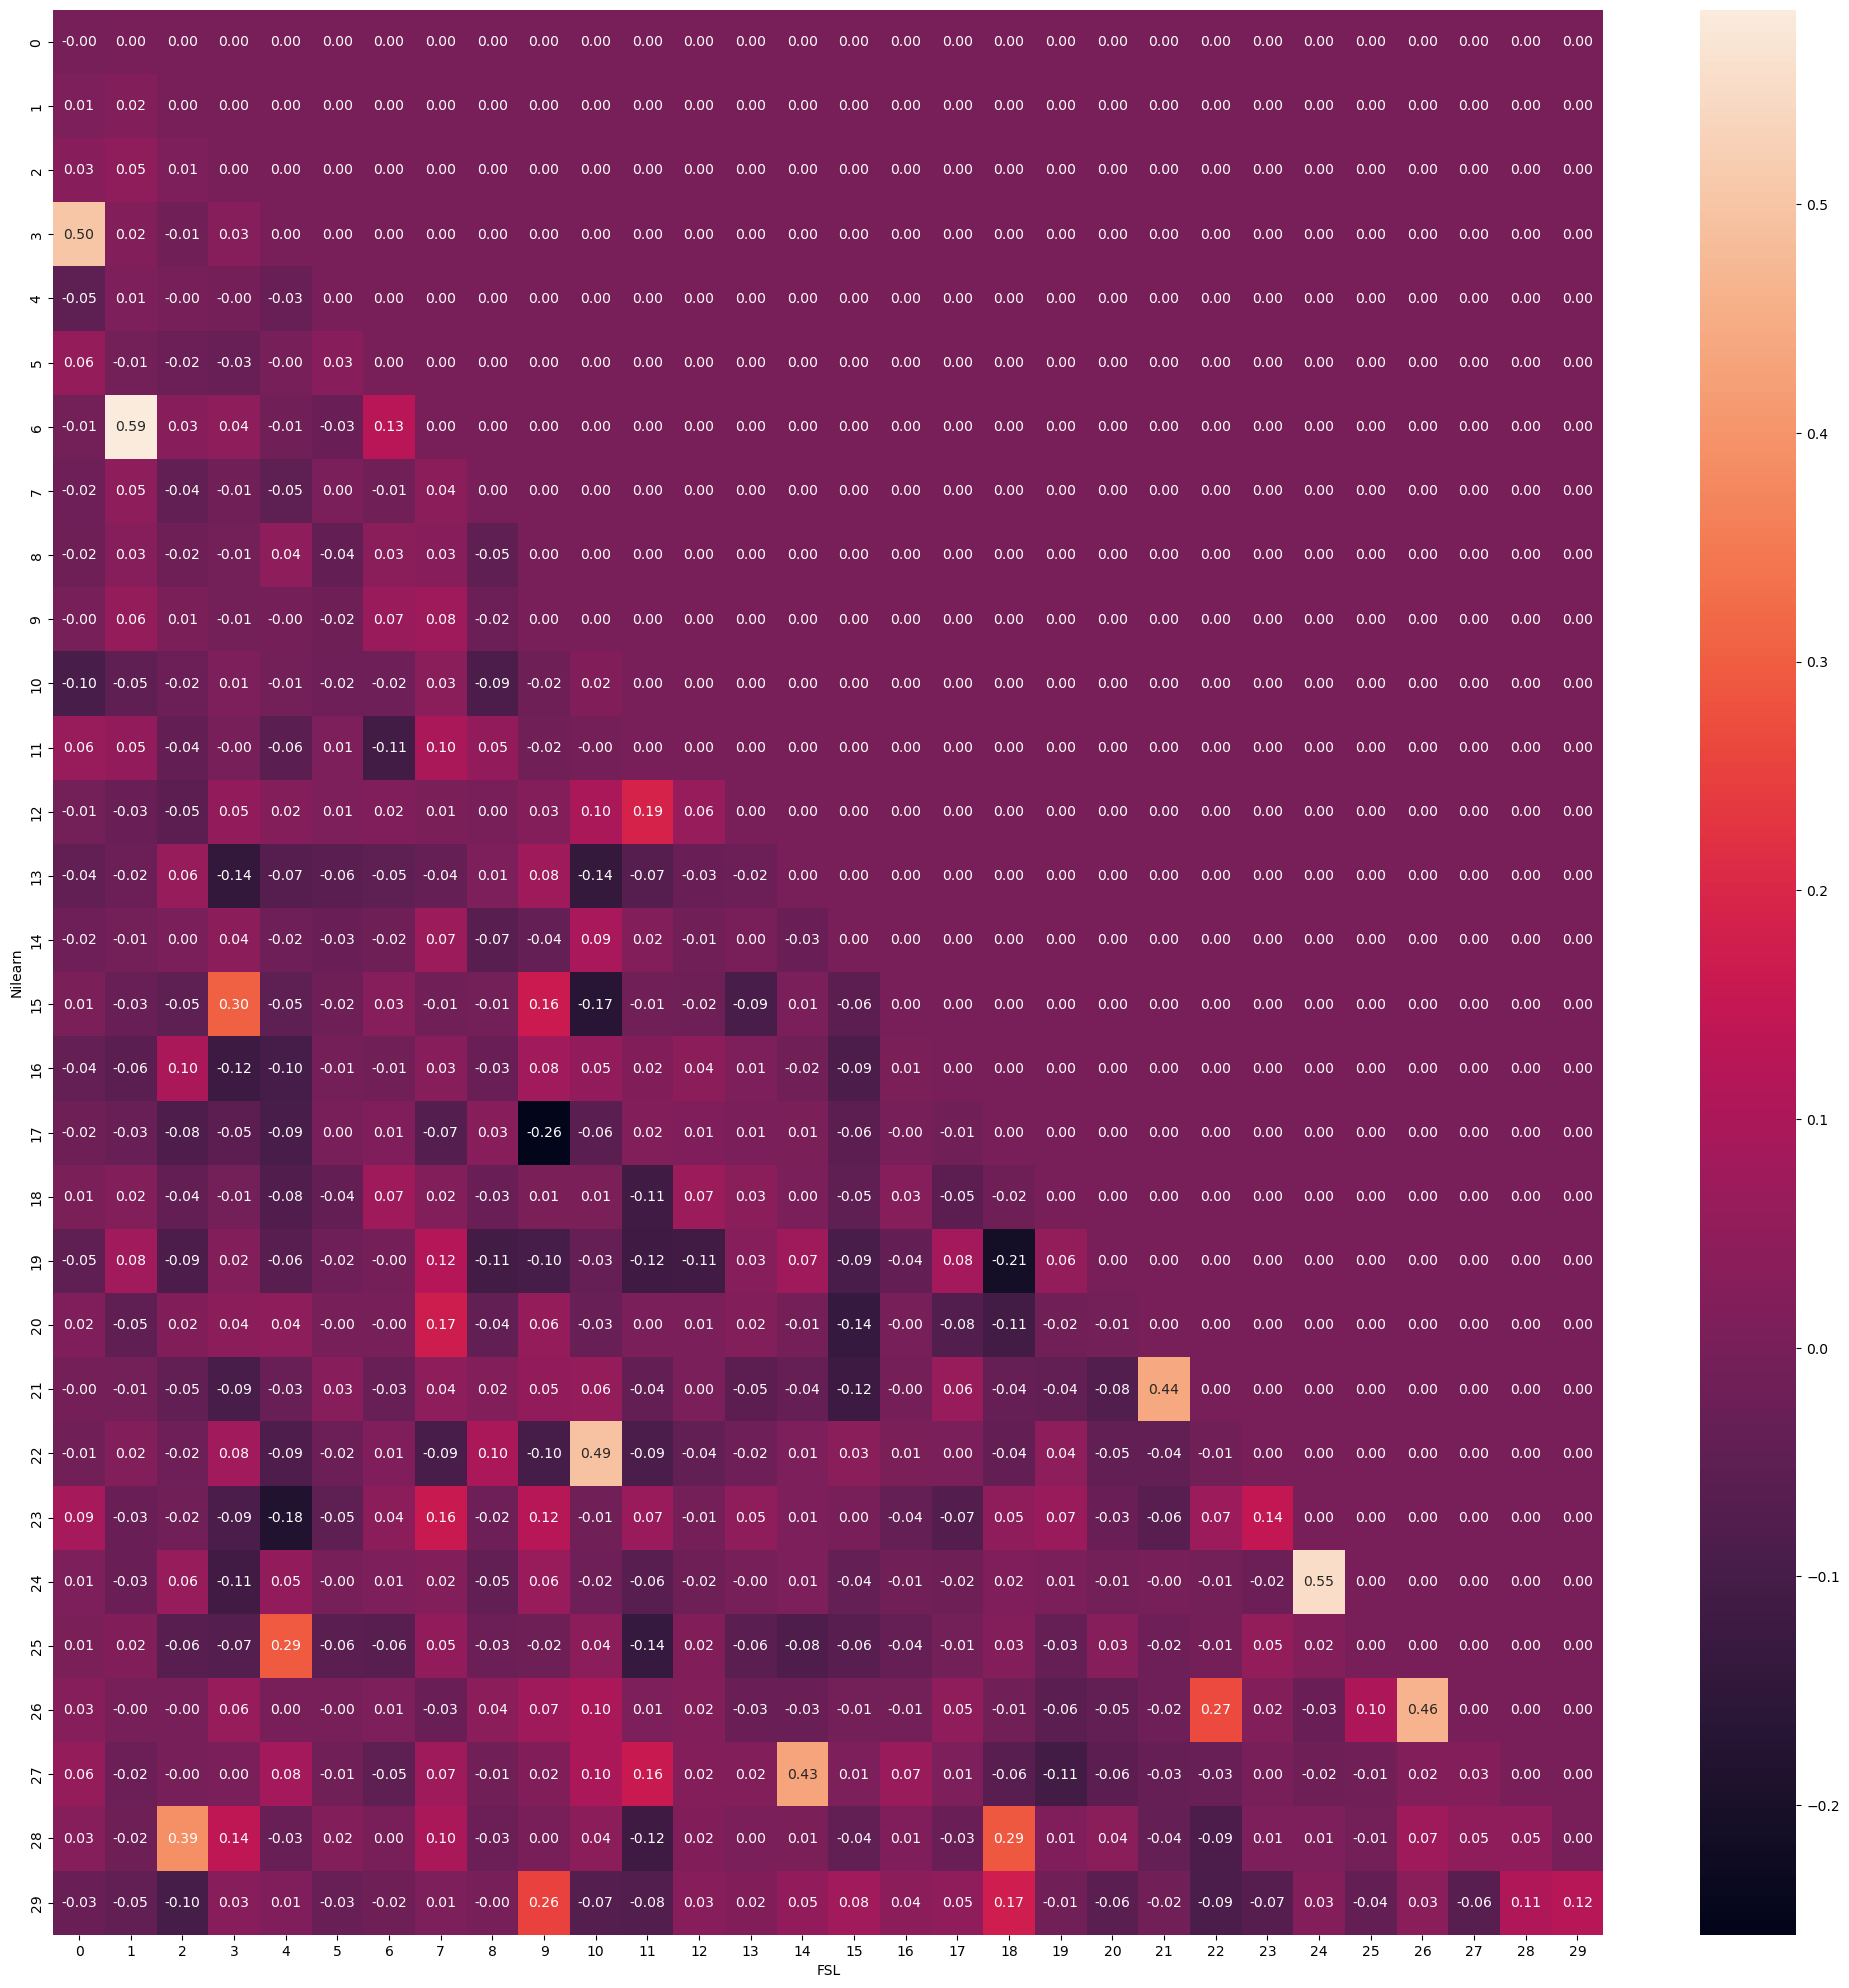

In [45]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(IC_corr, annot=True, fmt=".2f")
plt.xlabel("FSL")
plt.ylabel("Nilearn")

In [21]:
# plt.plot(IC1_corr)

In [26]:
t_modes = np.loadtxt("/data/origami/niusha/out/ica_original_maps/melodic_Tmodes")

In [27]:
t_modes.shape

(349, 30)

In [28]:
import pandas as pd

In [29]:
subject_df = pd.read_csv("/data/origami/niusha/input/subject_IDs.csv")

N = len(subject_df.ID)
ID_map = dict(zip(range(N),subject_df.ID))

Healthy_index = np.where(subject_df.PD == 0)
Healthy_subject = subject_df.ID.iloc[Healthy_index]

PD_index = np.where(subject_df.PD == 1)
PD_subject = subject_df.ID.iloc[PD_index]

In [37]:
PD_tmodes = t_modes[PD_index][:]
Healthy_tmodes = t_modes[Healthy_index][:]

In [36]:
PD_tmodes.shape

(232, 30)

In [38]:
Healthy_tmodes.shape


(117, 30)

In [40]:
from scipy.stats import ttest_ind

In [41]:
Tstat = np.zeros((1,30))
Pval = np.zeros((1,30))

In [42]:
for i in range(30):
    Tstat[0,i], Pval[0,i] = ttest_ind(Healthy_tmodes[:,i], PD_tmodes[:,i])

In [46]:
idx_p = np.argmin(Pval)
idx_p

5

In [47]:
idx_t = np.argmax(Tstat)
idx_t

5

In [50]:
Tstat[0,5]

3.8135591537051794

In [51]:
Pval[0,5]

0.0001620906806719828